Importing pandas , numpy , matplotlib , seaborn and warnings library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv data as pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

Show top 5 records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of a dataset

In [6]:
df.shape

(1000, 8)

data check to perform :
1. check for missing values
2. check for duplicates
3. check for data type of each column
4. check for unique values in each column
5) check statistics of data
6) check various categories present in different categorical column 



check missing values

In [ ]:
df.isna().sum()   ## there is no missing values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

check duplicates

In [4]:
df.duplicated().sum()  ## there are no duplicate records in the dataset

0

check datatypes

In [5]:
## check null and dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking the number of unique values of each column 

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check statistics of dataset

In [7]:
df.describe()  ## means come b/w 66 & 68.05 , std come b/w 15 and 15.19 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring data

In [17]:
print("categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())


categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


In [8]:
## define numerical and categorical variables
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

## print columns

print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features :['math score', 'reading score', 'writing score']
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Feature engineering:

adding columns for total score and average score:

In [10]:
df['total_score']=df['math score']  +   df['reading score'] + df['writing score']
df['average_score']=df['total_score']/3 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full=df[df['reading score'] ==100]['average_score'].count()
writing_full=df[df['writing score'] ==100]['average_score'].count()
math_full=df[df['math score'] ==100]['average_score'].count()

print(f'number of students with full marks in reading:{reading_full}')
print(f'number of students with full marks in writing:{writing_full}')
print(f'number of students with full marks in math:{math_full}')

number of students with full marks in reading:17
number of students with full marks in writing:14
number of students with full marks in math:7


In [13]:
reading_less_20=df[df['reading score'] <=20]['average_score'].count()
writing_less_20=df[df['writing score'] <=20]['average_score'].count()
math_less_20=df[df['math score'] <=20]['average_score'].count()

print(f'number of students with less than 20 marks in reading:{reading_less_20}')
print(f'number of students with less than 20 marks in writing:{writing_less_20}')
print(f'number of students with less than 20 marks in math:{math_less_20}')

number of students with less than 20 marks in reading:1
number of students with less than 20 marks in writing:3
number of students with less than 20 marks in math:4


from above we get student perfomed worst in math and best performance in reading section 

Exploring data(visualization):

* histogram
* kde 

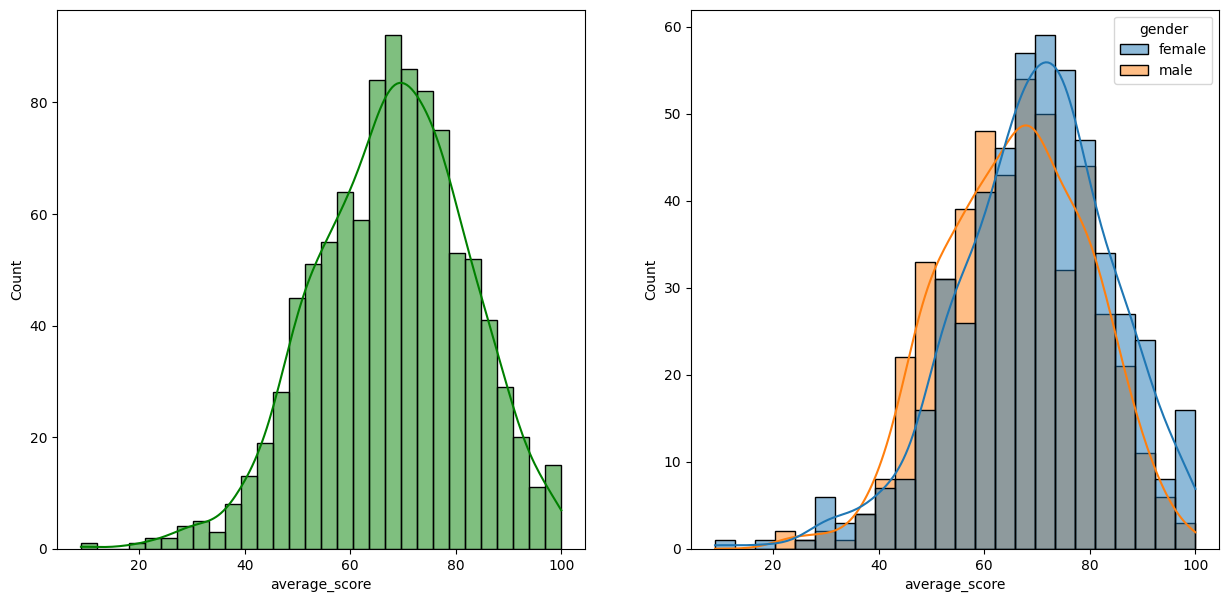

In [15]:
 ## for average_score
fig,axis=plt.subplots(1,2,figsize=(15,7)) 
plt.subplot(121)
sns.histplot(data=df,x='average_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')  ##average wrt to gender 
plt.show()

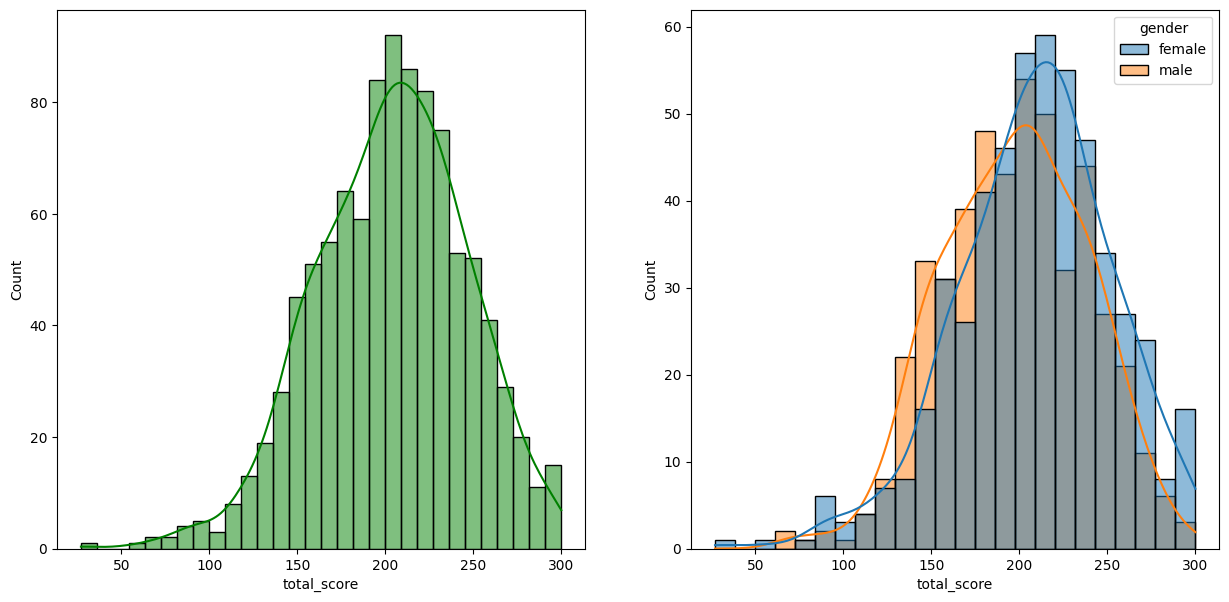

In [ ]:
## for total score:
fig,axis=plt.subplots(1,2,figsize=(15,7))  
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')  ##total wrt to gender 
plt.show()

female student tend to perform well then male student 

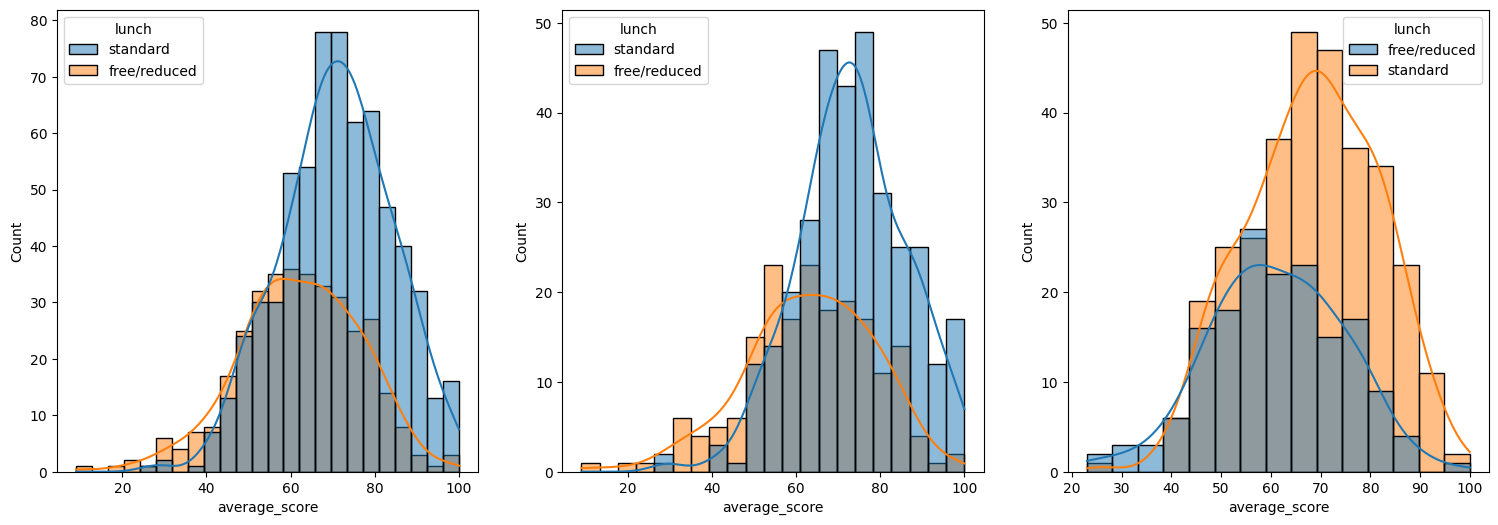

In [17]:
fig,axis=plt.subplots(1,3,figsize=(25,6))  
plt.subplot(141) 
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')  ##average wrt to lunch
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')  
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()